
#Introdu√ß√£o

As bases de dados escolhidas foram obtidas no site do Tribunal Superior Eleitoral ([TSE](https://dadosabertos.tse.jus.br/dataset/candidatos-2024)), e s√£o referentes √†s elei√ß√µes de 2024 para os cargos de prefeito, vice-prefeito e vereador de S√£o Paulo. A escolha desse dataset foi motivada pelo atual cen√°rio pol√≠tico brasileiro, marcado por incertezas e debates sobre o futuro pol√≠tico e administrativo do estado de S√£o Paulo. Analisar esses dados √© crucial, pois as elei√ß√µes municipais t√™m um impacto direto nas pol√≠ticas p√∫blicas que afetam a vida dos cidad√£os, e entender os padr√µes e tend√™ncias pode fornecer insights valiosos para prever poss√≠veis desdobramentos e influ√™ncias no cen√°rio pol√≠tico local.

O que chamou a aten√ß√£o nesses dados foi a riqueza de detalhes dispon√≠veis, como informa√ß√µes sobre candidaturas, despesas de campanha, distribui√ß√£o por g√™nero, idade, e partido. Esses aspectos s√£o fundamentais para entender melhor o perfil dos candidatos, as estrat√©gias eleitorais adotadas e como esses fatores podem influenciar os resultados eleitorais. Acredita-se que essa an√°lise pode gerar bons insights, como identificar tend√™ncias de investimento em campanhas, padr√µes de participa√ß√£o feminina nas elei√ß√µes, e a rela√ß√£o entre gasto de campanha e sucesso eleitoral.

#Bibliotecas

In [34]:
#importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import sqlite3
from google.colab import files
import numpy as np
import plotly.express as px
from scipy import stats
from scipy.stats import f_oneway
import statsmodels.stats.multicomp as mc
from scipy.stats import kruskal

#Alterar a linguagem

In [35]:
#pacote para identificar o encoding da base de dados
!pip install chardet

-Base Candidatos

In [36]:
#identificando o encoding e a linguagem da base de dados
import chardet

with open('/content/drive/MyDrive/REPROGRAMA/on33-python-s13-projeto-guiado-II/Projeto Guiado/consulta_cand_2024/consulta_cand_2024_SP.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000)) # Read a portion of the file

print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [37]:
#visualiza√ß√£o da base de dados
!head -n 25 '/content/drive/MyDrive/REPROGRAMA/on33-python-s13-projeto-guiado-II/Projeto Guiado/consulta_cand_2024/consulta_cand_2024_SP.csv' | tail -n 5

"27/08/2024";"19:30:34";2024;2;"ELEIÔøΩÔøΩO ORDINÔøΩRIA";1;619;"EleiÔøΩÔøΩes Municipais 2024";"06/10/2024";"MUNICIPAL";"SP";"67130";"MOGI DAS CRUZES";13;"VEREADOR";250001997507;10789;"MARTA VITORINO JANUÔøΩRIO";"MARTINHA";"#NULO#";"-4";"NÔøΩO DIVULGÔøΩVEL";-3;"#NE";"PARTIDO ISOLADO";10;"REPUBLICANOS";"REPUBLICANOS";-1;"#NULO#";"#NULO#";"#NULO#";250001706184;"PARTIDO ISOLADO";"REPUBLICANOS - REPUBLICANOS - MOGI DAS CRUZES - SP";"SP";"09/05/1962";"031083510108";4;"FEMININO";6;"ENSINO MÔøΩDIO COMPLETO";1;"SOLTEIRO(A)";"01";"BRANCA";298;"SERVIDOR PÔøΩBLICO MUNICIPAL";-1;"#NULO#"
"27/08/2024";"19:30:34";2024;2;"ELEIÔøΩÔøΩO ORDINÔøΩRIA";1;619;"EleiÔøΩÔøΩes Municipais 2024";"06/10/2024";"MUNICIPAL";"SP";"69213";"PRAIA GRANDE";13;"VEREADOR";250002318218;20333;"JOAO BENEDITO ALVES MAGALHAES";"JOÔøΩO MAGALHAES";"#NULO#";"-4";"NÔøΩO DIVULGÔøΩVEL";-3;"#NE";"PARTIDO ISOLADO";20;"PODE";"PODEMOS";-1;"#NULO#";"#NULO#";"#NULO#";250001754918;"PARTIDO ISOLADO";"Podemos - PODE - PRAIA GRANDE - SP";"CE";"1

In [38]:
#Substituir ";"
# 'on_bad_lines' indica o que fazer em linhas com erros
# 'skip' ir√° pular linhas que causam erros.
candidato = pd.read_csv('/content/drive/MyDrive/REPROGRAMA/on33-python-s13-projeto-guiado-II/Projeto Guiado/consulta_cand_2024/consulta_cand_2024_SP.csv', encoding='ISO-8859-1', sep=';', on_bad_lines='skip')

-Base Complemento

In [39]:
#identificando o encoding e a linguagem da base de dados
import chardet

with open('/content/drive/MyDrive/REPROGRAMA/on33-python-s13-projeto-guiado-II/Projeto Guiado/consulta_cand_complementar_2024/consulta_cand_complementar_2024_SP.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000)) # Read a portion of the file

print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [40]:
#visualiza√ß√£o da base de dados
!head -n 25 '/content/drive/MyDrive/REPROGRAMA/on33-python-s13-projeto-guiado-II/Projeto Guiado/consulta_cand_complementar_2024/consulta_cand_complementar_2024_SP.csv' | tail -n 5

"27/08/2024";"19:30:34";2024;619;250002023453;-3;"#NE";1;"BRASILEIRA NATA";-3;"MAIRINQUE";"37";"N";-1;"#NULO#";"53179.07";"N";"S";"-1";"06004589120246260131";"-3";"#NE";"-3";"#NE";"NÔøΩO";"#NULO#";-1;"#NULO#";"N";"N";-1;-1;"2024-08-08 14:54:46";8;"AGUARDANDO JULGAMENTO";"-1";"#NULO#";"-1";"#NULO#";-1;"#NULO#";-1;"#NULO#";-1;"#NULO#"
"27/08/2024";"19:30:34";2024;619;250002013157;-3;"#NE";1;"BRASILEIRA NATA";-3;"PRESIDENTE EPITÔøΩCIO";"25";"N";-1;"#NULO#";"38659.48";"N";"S";"-1";"06001237420246260195";"-3";"#NE";"-3";"#NE";"NÔøΩO";"#NULO#";-1;"#NULO#";"N";"N";-1;-1;"2024-08-08 11:28:01";8;"AGUARDANDO JULGAMENTO";"-1";"#NULO#";"-1";"#NULO#";-1;"#NULO#";-1;"#NULO#";-1;"#NULO#"
"27/08/2024";"19:30:34";2024;619;250002257538;-3;"#NE";1;"BRASILEIRA NATA";-3;"ITAPETININGA";"34";"N";0;"NÔøΩO INFORMADO";"15985.08";"N";"N";"-1";"06003226920246260010";"-3";"#NE";"-3";"#NE";"NÔøΩO";"#NULO#";-1;"#NULO#";"N";"N";-1;-1;"2024-08-14 11:04:24";8;"AGUARDANDO JULGAMENTO";"-1";"#NULO#";"-1";"#NULO#";-1;"#NUL

In [41]:
#Substituir ";"
# 'on_bad_lines' indica o que fazer em linhas com erros
# 'skip' ir√° pular linhas que causam erros.
complemento = pd.read_csv('/content/drive/MyDrive/REPROGRAMA/on33-python-s13-projeto-guiado-II/Projeto Guiado/consulta_cand_complementar_2024/consulta_cand_complementar_2024_SP.csv', encoding='ISO-8859-1', sep=';', on_bad_lines='skip')

#An√°lise Descritiva da Base de Dados

-Base Candidato

In [42]:
#Verificar as colunas na base de dados
candidato.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA_ELEICAO', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO',
       'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO',
       'NM_URNA_CANDIDATO', 'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO',
       'DS_EMAIL', 'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'NR_FEDERACAO', 'NM_FEDERACAO', 'SG_FEDERACAO',
       'DS_COMPOSICAO_FEDERACAO', 'SQ_COLIGACAO', 'NM_COLIGACAO',
       'DS_COMPOSICAO_COLIGACAO', 'SG_UF_NASCIMENTO', 'DT_NASCIMENTO',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO', 'DS_GENERO',
       'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO',
       'DS_OCUPACAO', 'CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO'],
      dtype='object')

In [43]:
#verificar as 5 primeiras linhas da base de dados candidato
candidato.head()

DT_GERACAO HH_GERACAO  ANO_ELEICAO  CD_TIPO_ELEICAO    NM_TIPO_ELEICAO  \
0  27/08/2024   19:30:34         2024                2  ELEI√á√ÉO ORDIN√ÅRIA   
1  27/08/2024   19:30:34         2024                2  ELEI√á√ÉO ORDIN√ÅRIA   
2  27/08/2024   19:30:34         2024                2  ELEI√á√ÉO ORDIN√ÅRIA   
3  27/08/2024   19:30:34         2024                2  ELEI√á√ÉO ORDIN√ÅRIA   
4  27/08/2024   19:30:34         2024                2  ELEI√á√ÉO ORDIN√ÅRIA   

   NR_TURNO  CD_ELEICAO                DS_ELEICAO  DT_ELEICAO  \
0         1         619  Elei√ß√µes Municipais 2024  06/10/2024   
1         1         619  Elei√ß√µes Municipais 2024  06/10/2024   
2         1         619  Elei√ß√µes Municipais 2024  06/10/2024   
3         1         619  Elei√ß√µes Municipais 2024  06/10/2024   
4         1         619  Elei√ß√µes Municipais 2024  06/10/2024   

  TP_ABRANGENCIA_ELEICAO  ... CD_GRAU_INSTRUCAO      DS_GRAU_INSTRUCAO  \
0              MUNICIPAL  ...                 6  ENSINO M√âDIO COMPLETO   
1              MUNICIPAL  ...                 6  ENSINO M√âDIO COMPLETO   
2              MUNICIPAL  ...                 6  ENSINO M√âDIO COMPLETO   
3              MUNICIPAL  ...                 6  ENSINO M√âDIO COMPLETO   
4              MUNICIPAL  ...                 6  ENSINO M√âDIO COMPLETO   

  CD_ESTADO_CIVIL  DS_ESTADO_CIVIL CD_COR_RACA  DS_COR_RACA  CD_OCUPACAO  \
0               3        CASADO(A)           1       BRANCA          278   
1               3        CASADO(A)           1       BRANCA          243   
2               1      SOLTEIRO(A)           1       BRANCA          999   
3               3        CASADO(A)           1       BRANCA          999   
4               3        CASADO(A)           1       BRANCA          257   

                                         DS_OCUPACAO CD_SIT_TOT_TURNO  \
0                                           VEREADOR               -1   
1  T√âCNICO DE ENFERMAGEM E ASSEMELHADOS (EXCETO E...               -1   
2                                             OUTROS               -1   
3                                             OUTROS               -1   
4                                         EMPRES√ÅRIO               -1   

  DS_SIT_TOT_TURNO  
0           #NULO#  
1           #NULO#  
2           #NULO#  
3           #NULO#  
4           #NULO#  

[5 rows x 50 columns]

In [44]:
#Verificar nulos na base candidato
candidato.isnull().sum()

DT_GERACAO                       0
HH_GERACAO                       0
ANO_ELEICAO                      0
CD_TIPO_ELEICAO                  0
NM_TIPO_ELEICAO                  0
NR_TURNO                         0
CD_ELEICAO                       0
DS_ELEICAO                       0
DT_ELEICAO                       0
TP_ABRANGENCIA_ELEICAO           0
SG_UF                            0
SG_UE                            0
NM_UE                            0
CD_CARGO                         0
DS_CARGO                         0
SQ_CANDIDATO                     0
NR_CANDIDATO                     0
NM_CANDIDATO                     0
NM_URNA_CANDIDATO                1
NM_SOCIAL_CANDIDATO              0
NR_CPF_CANDIDATO                 0
DS_EMAIL                         0
CD_SITUACAO_CANDIDATURA          0
DS_SITUACAO_CANDIDATURA          0
TP_AGREMIACAO                    0
NR_PARTIDO                       0
SG_PARTIDO                       0
NM_PARTIDO                       0
NR_FEDERACAO                     0
NM_FEDERACAO                     0
SG_FEDERACAO                     0
DS_COMPOSICAO_FEDERACAO          0
SQ_COLIGACAO                     0
NM_COLIGACAO                     0
DS_COMPOSICAO_COLIGACAO          0
SG_UF_NASCIMENTO                 0
DT_NASCIMENTO                    0
NR_TITULO_ELEITORAL_CANDIDATO    0
CD_GENERO                        0
DS_GENERO                        0
CD_GRAU_INSTRUCAO                0
DS_GRAU_INSTRUCAO                0
CD_ESTADO_CIVIL                  0
DS_ESTADO_CIVIL                  0
CD_COR_RACA                      0
DS_COR_RACA                      0
CD_OCUPACAO                      0
DS_OCUPACAO                      0
CD_SIT_TOT_TURNO                 0
DS_SIT_TOT_TURNO                 0
dtype: int64

In [45]:
#Quantidade de linhas
candidato.shape

(77591, 50)

In [46]:
candidato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77591 entries, 0 to 77590
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   DT_GERACAO                     77591 non-null  object
 1   HH_GERACAO                     77591 non-null  object
 2   ANO_ELEICAO                    77591 non-null  int64 
 3   CD_TIPO_ELEICAO                77591 non-null  int64 
 4   NM_TIPO_ELEICAO                77591 non-null  object
 5   NR_TURNO                       77591 non-null  int64 
 6   CD_ELEICAO                     77591 non-null  int64 
 7   DS_ELEICAO                     77591 non-null  object
 8   DT_ELEICAO                     77591 non-null  object
 9   TP_ABRANGENCIA_ELEICAO         77591 non-null  object
 10  SG_UF                          77591 non-null  object
 11  SG_UE                          77591 non-null  int64 
 12  NM_UE                          77591 non-null  object
 13  C

In [47]:
# Lista das colunas que voc√™ deseja selecionar
colunas_selecionadas = [
    'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO', 'SQ_CANDIDATO',
    'NR_CANDIDATO', 'NM_CANDIDATO', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'SG_UF_NASCIMENTO',
    'DT_NASCIMENTO', 'CD_GENERO', 'DS_GENERO', 'CD_GRAU_INSTRUCAO',
    'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL', 'DS_ESTADO_CIVIL',
    'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO', 'DS_OCUPACAO'
]

# Selecionando as colunas do DataFrame 'candidatos'
candidatos = candidato[colunas_selecionadas]

# Exibir o DataFrame selecionado
print(candidatos)

      SG_UF  SG_UE                  NM_UE  CD_CARGO  DS_CARGO  SQ_CANDIDATO  \
0        SP  72230        VALENTIM GENTIL        13  VEREADOR  250002276626   
1        SP  64319       GABRIEL MONTEIRO        13  VEREADOR  250002275730   
2        SP  64319       GABRIEL MONTEIRO        13  VEREADOR  250002277051   
3        SP  72273             VALPARA√çSO        13  VEREADOR  250002279457   
4        SP  63118          CARAGUATATUBA        13  VEREADOR  250002275840   
...     ...    ...                    ...       ...       ...           ...   
77586    SP  62111               BARRINHA        13  VEREADOR  250001920422   
77587    SP  71498                 SUMAR√â        13  VEREADOR  250001942575   
77588    SP  64874                  IBAT√â        13  VEREADOR  250001946083   
77589    SP  71153          S√ÉO SEBASTI√ÉO        13  VEREADOR  250002341798   
77590    SP  70955  S√ÉO JOS√â DO RIO PARDO        13  VEREADOR  250002346612   

       NR_CANDIDATO                         

In [48]:
#Salvar copia da base
candidato_backup = candidatos.copy()

-Base Complemento

In [49]:
# Verificar as colunas da base de dados
complemento.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_ELEICAO', 'SQ_CANDIDATO',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND',
       'CD_NACIONALIDADE', 'DS_NACIONALIDADE', 'CD_MUNICIPIO_NASCIMENTO',
       'NM_MUNICIPIO_NASCIMENTO', 'NR_IDADE_DATA_POSSE', 'ST_QUILOMBOLA',
       'CD_ETNIA_INDIGENA', 'DS_ETNIA_INDIGENA', 'VR_DESPESA_MAX_CAMPANHA',
       'ST_REELEICAO', 'ST_DECLARAR_BENS', 'NR_PROTOCOLO_CANDIDATURA',
       'NR_PROCESSO', 'CD_SITUACAO_CANDIDATO_PLEITO',
       'DS_SITUACAO_CANDIDATO_PLEITO', 'CD_SITUACAO_CANDIDATO_URNA',
       'DS_SITUACAO_CANDIDATO_URNA', 'ST_CANDIDATO_INSERIDO_URNA',
       'NM_TIPO_DESTINACAO_VOTOS', 'CD_SITUACAO_CANDIDATO_TOT',
       'DS_SITUACAO_CANDIDATO_TOT', 'ST_PREST_CONTAS', 'ST_SUBSTITUIDO',
       'SQ_SUBSTITUIDO', 'SQ_ORDEM_SUPLENCIA', 'DT_ACEITE_CANDIDATURA',
       'CD_SITUACAO_JULGAMENTO', 'DS_SITUACAO_JULGAMENTO',
       'CD_SITUACAO_JULGAMENTO_PLEITO', 'DS_SITUACAO_JULGAMENTO_PLEITO',
       'CD_SITUACAO_JULGAMENTO_

In [50]:
#verificar as 5 primeiras linhas da base de dados complemento
complemento.head()

DT_GERACAO HH_GERACAO  ANO_ELEICAO  CD_ELEICAO  SQ_CANDIDATO  \
0  27/08/2024   19:30:34         2024         619  250001971482   
1  27/08/2024   19:30:34         2024         619  250001899774   
2  27/08/2024   19:30:34         2024         619  250002147813   
3  27/08/2024   19:30:34         2024         619  250001968946   
4  27/08/2024   19:30:34         2024         619  250001951792   

   CD_DETALHE_SITUACAO_CAND DS_DETALHE_SITUACAO_CAND  CD_NACIONALIDADE  \
0                        -3                      #NE                 1   
1                        -3                      #NE                 1   
2                        -3                      #NE                 1   
3                        -3                      #NE                 1   
4                        -3                      #NE                 1   

  DS_NACIONALIDADE  CD_MUNICIPIO_NASCIMENTO  ...  \
0  BRASILEIRA NATA                       -3  ...   
1  BRASILEIRA NATA                       -3  ...   
2  BRASILEIRA NATA                       -3  ...   
3  BRASILEIRA NATA                       -3  ...   
4  BRASILEIRA NATA                       -3  ...   

  CD_SITUACAO_JULGAMENTO_PLEITO  DS_SITUACAO_JULGAMENTO_PLEITO  \
0                            -1                         #NULO#   
1                            -1                         #NULO#   
2                            -1                         #NULO#   
3                            -1                         #NULO#   
4                            -1                         #NULO#   

  CD_SITUACAO_JULGAMENTO_URNA  DS_SITUACAO_JULGAMENTO_URNA  \
0                          -1                       #NULO#   
1                          -1                       #NULO#   
2                          -1                       #NULO#   
3                          -1                       #NULO#   
4                          -1                       #NULO#   

  CD_SITUACAO_CASSACAO  DS_SITUACAO_CASSACAO CD_SITUACAO_CASSACAO_MIDIA  \
0                   -1                #NULO#                         -1   
1                   -1                #NULO#                         -1   
2                   -1                #NULO#                         -1   
3                   -1                #NULO#                         -1   
4                   -1                #NULO#                         -1   

  DS_SITUACAO_CASSACAO_MIDIA  CD_SITUACAO_DIPLOMA  DS_SITUACAO_DIPLOMA  
0                     #NULO#                   -1               #NULO#  
1                     #NULO#                   -1               #NULO#  
2                     #NULO#                   -1               #NULO#  
3                     #NULO#                   -1               #NULO#  
4                     #NULO#                   -1               #NULO#  

[5 rows x 45 columns]

In [51]:
#Verificar nulos na base de dados complemento
complemento.isnull().sum()

DT_GERACAO                       0
HH_GERACAO                       0
ANO_ELEICAO                      0
CD_ELEICAO                       0
SQ_CANDIDATO                     0
CD_DETALHE_SITUACAO_CAND         0
DS_DETALHE_SITUACAO_CAND         0
CD_NACIONALIDADE                 0
DS_NACIONALIDADE                 0
CD_MUNICIPIO_NASCIMENTO          0
NM_MUNICIPIO_NASCIMENTO          0
NR_IDADE_DATA_POSSE              0
ST_QUILOMBOLA                    0
CD_ETNIA_INDIGENA                0
DS_ETNIA_INDIGENA                0
VR_DESPESA_MAX_CAMPANHA          0
ST_REELEICAO                     0
ST_DECLARAR_BENS                 0
NR_PROTOCOLO_CANDIDATURA         0
NR_PROCESSO                      0
CD_SITUACAO_CANDIDATO_PLEITO     0
DS_SITUACAO_CANDIDATO_PLEITO     0
CD_SITUACAO_CANDIDATO_URNA       0
DS_SITUACAO_CANDIDATO_URNA       0
ST_CANDIDATO_INSERIDO_URNA       0
NM_TIPO_DESTINACAO_VOTOS         0
CD_SITUACAO_CANDIDATO_TOT        0
DS_SITUACAO_CANDIDATO_TOT        0
ST_PREST_CONTAS                  0
ST_SUBSTITUIDO                   0
SQ_SUBSTITUIDO                   0
SQ_ORDEM_SUPLENCIA               0
DT_ACEITE_CANDIDATURA            0
CD_SITUACAO_JULGAMENTO           0
DS_SITUACAO_JULGAMENTO           0
CD_SITUACAO_JULGAMENTO_PLEITO    0
DS_SITUACAO_JULGAMENTO_PLEITO    0
CD_SITUACAO_JULGAMENTO_URNA      0
DS_SITUACAO_JULGAMENTO_URNA      0
CD_SITUACAO_CASSACAO             0
DS_SITUACAO_CASSACAO             0
CD_SITUACAO_CASSACAO_MIDIA       0
DS_SITUACAO_CASSACAO_MIDIA       0
CD_SITUACAO_DIPLOMA              0
DS_SITUACAO_DIPLOMA              0
dtype: int64

In [52]:
#Quantidade de linhas
complemento.shape

(77591, 45)

In [53]:
# Lista das colunas que voc√™ deseja selecionar
colunas_selecionadas = [
'SQ_CANDIDATO', 'DS_NACIONALIDADE', 'NM_MUNICIPIO_NASCIMENTO',
'NR_IDADE_DATA_POSSE', 'ST_QUILOMBOLA', 'VR_DESPESA_MAX_CAMPANHA', 'ST_REELEICAO', 'ST_DECLARAR_BENS'
]

# Selecionando as colunas do DataFrame 'candidatos'
complementos = complemento[colunas_selecionadas]

# Exibir o DataFrame selecionado
print(complementos)

       SQ_CANDIDATO DS_NACIONALIDADE NM_MUNICIPIO_NASCIMENTO  \
0      250001971482  BRASILEIRA NATA               S√ÉO PAULO   
1      250001899774  BRASILEIRA NATA   S√ÉO JOS√â DO RIO PRETO   
2      250002147813  BRASILEIRA NATA           PARIQUERA-A√áU   
3      250001968946  BRASILEIRA NATA              COSM√ìPOLIS   
4      250001951792  BRASILEIRA NATA              CAFEL√ÇNDIA   
...             ...              ...                     ...   
77586  250002166022  BRASILEIRA NATA                CAMPINAS   
77587  250002119312  BRASILEIRA NATA                SOROCABA   
77588  250002219506  BRASILEIRA NATA                PORECATU   
77589  250002347047  BRASILEIRA NATA   S√ÉO JOS√â DO RIO PARDO   
77590  250002136036  BRASILEIRA NATA             SANTO ANDR√â   

       NR_IDADE_DATA_POSSE ST_QUILOMBOLA  VR_DESPESA_MAX_CAMPANHA  \
0                       53             N                129911.43   
1                       41             N                 68181.85   
2              

In [54]:
#Salvar copia da base
complemento_backup = complementos.copy()

- **JOIN** para unir as tabelas

In [55]:
# Renomear a coluna duplicada no DataFrame 'candidatos'
candidatos = candidatos.rename(columns={'SQ_CANDIDATO': 'SQ_CANDIDATO_Candidato'})
complementos = complementos.rename(columns={'SQ_CANDIDATO': 'SQ_CANDIDATO_Complemento'})

# Conex√£o com SQLite em mem√≥ria
conn = sqlite3.connect(':memory:')

# Salvar os DataFrames como tabelas SQLite
candidatos.to_sql('candidato', conn, index=False)
complementos.to_sql('complemento', conn, index=False)

# Realizar o JOIN com as colunas renomeadas
eleicao = pd.read_sql_query('SELECT * FROM candidato JOIN complemento ON candidato.SQ_CANDIDATO_Candidato = complemento.SQ_CANDIDATO_Complemento', conn)

# Fechar a conex√£o
conn.close()

# Exibir o resultado
print(eleicao)

      SG_UF  SG_UE                  NM_UE  CD_CARGO  DS_CARGO  \
0        SP  72230        VALENTIM GENTIL        13  VEREADOR   
1        SP  64319       GABRIEL MONTEIRO        13  VEREADOR   
2        SP  64319       GABRIEL MONTEIRO        13  VEREADOR   
3        SP  72273             VALPARA√çSO        13  VEREADOR   
4        SP  63118          CARAGUATATUBA        13  VEREADOR   
...     ...    ...                    ...       ...       ...   
77586    SP  62111               BARRINHA        13  VEREADOR   
77587    SP  71498                 SUMAR√â        13  VEREADOR   
77588    SP  64874                  IBAT√â        13  VEREADOR   
77589    SP  71153          S√ÉO SEBASTI√ÉO        13  VEREADOR   
77590    SP  70955  S√ÉO JOS√â DO RIO PARDO        13  VEREADOR   

       SQ_CANDIDATO_Candidato  NR_CANDIDATO  \
0                250002276626         43777   
1                250002275730         55555   
2                250002277051         10100   
3                2500022

In [56]:
#Verificar nulos na base de dados complemento
eleicao.isnull().sum()

SG_UF                       0
SG_UE                       0
NM_UE                       0
CD_CARGO                    0
DS_CARGO                    0
SQ_CANDIDATO_Candidato      0
NR_CANDIDATO                0
NM_CANDIDATO                0
NR_PARTIDO                  0
SG_PARTIDO                  0
NM_PARTIDO                  0
SG_UF_NASCIMENTO            0
DT_NASCIMENTO               0
CD_GENERO                   0
DS_GENERO                   0
CD_GRAU_INSTRUCAO           0
DS_GRAU_INSTRUCAO           0
CD_ESTADO_CIVIL             0
DS_ESTADO_CIVIL             0
CD_COR_RACA                 0
DS_COR_RACA                 0
CD_OCUPACAO                 0
DS_OCUPACAO                 0
SQ_CANDIDATO_Complemento    0
DS_NACIONALIDADE            0
NM_MUNICIPIO_NASCIMENTO     0
NR_IDADE_DATA_POSSE         0
ST_QUILOMBOLA               0
VR_DESPESA_MAX_CAMPANHA     0
ST_REELEICAO                0
ST_DECLARAR_BENS            0
dtype: int64

- **An√°lise de Outliers**.
Identifiquei 10 candidatos com valores exorbitantes na base de dados (VR_DESPESA_MAX_CAMPANHA).

*R$67.276.114,50 (sessenta e sete milh√µes, duzentos e setenta e seis mil, cento e quatorze reais e cinquenta centavos)

In [57]:
# Filtrando os valores maiores que 10.000.000,00 (10 milhoes) na coluna VR_DESPESA_MAX_CAMPANHA
eleicoes_filtradas = eleicao[eleicao['VR_DESPESA_MAX_CAMPANHA'] >= 10000000.00]

# Exibindo o DataFrame filtrado
print(eleicoes_filtradas)

      SG_UF  SG_UE      NM_UE  CD_CARGO  DS_CARGO  SQ_CANDIDATO_Candidato  \
4177     SP  71072  S√ÉO PAULO        11  PREFEITO            250002098117   
9090     SP  71072  S√ÉO PAULO        11  PREFEITO            250001978066   
14305    SP  71072  S√ÉO PAULO        11  PREFEITO            250002180213   
38759    SP  71072  S√ÉO PAULO        11  PREFEITO            250002355541   
48452    SP  71072  S√ÉO PAULO        11  PREFEITO            250001884312   
51774    SP  71072  S√ÉO PAULO        11  PREFEITO            250002078851   
61624    SP  71072  S√ÉO PAULO        11  PREFEITO            250001926547   
64331    SP  71072  S√ÉO PAULO        11  PREFEITO            250002163891   
64458    SP  71072  S√ÉO PAULO        11  PREFEITO            250002031025   
72385    SP  71072  S√ÉO PAULO        11  PREFEITO            250002362195   

       NR_CANDIDATO                        NM_CANDIDATO  NR_PARTIDO  \
4177             15             RICARDO LUIS REIS NUNES          15   


- Notei que os dados acima n√£o representam outliers, mas sim os valores reais de campanha dos atuais candidatos √† prefeitura de S√£o Paulo.

In [58]:
#salvar no csv
eleicao.to_csv('candidatosSP.csv', index=False)

#baixar arquivo csv
files.download('candidatosSP.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Visualiza√ß√µes Gr√°ficas üìâüìà

   - **Distribui√ß√£o de G√™nero:** Analisar a propor√ß√£o de candidatos por g√™nero (`CD_GENERO`, `DS_GENERO`).

In [59]:
#Visualizar os valores √∫nicos na coluna DS_GENERO
eleicao['DS_GENERO'].unique()

array(['MASCULINO', 'FEMININO'], dtype=object)

In [60]:
# Descrever estat√≠sticas da coluna DS_GENERO
eleicao['DS_GENERO'].describe()

count         77591
unique            2
top       MASCULINO
freq          51168
Name: DS_GENERO, dtype: object

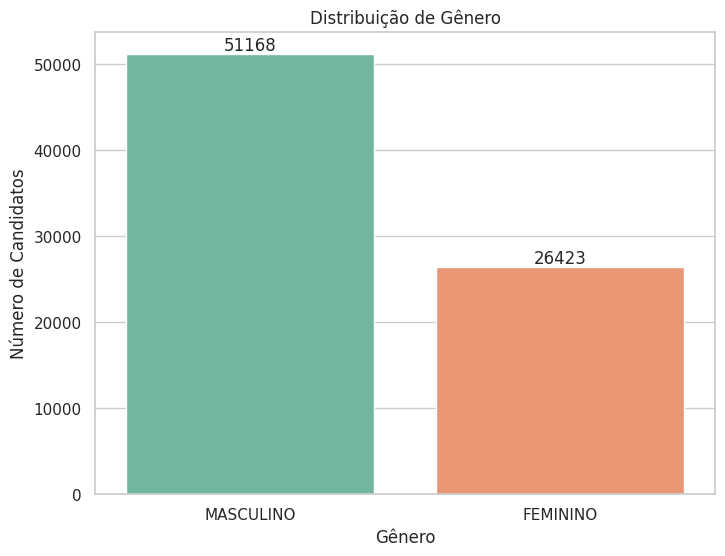

In [61]:
# Configura√ß√µes para gr√°ficos
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Distribui√ß√£o de G√™nero
ax = sns.countplot(x='DS_GENERO', data=eleicao, palette='Set2', hue='DS_GENERO')
plt.title('Distribui√ß√£o de G√™nero')
plt.xlabel('G√™nero')
plt.ylabel('N√∫mero de Candidatos')

# Adicionar r√≥tulos √†s barras
for index, value in enumerate(eleicao['DS_GENERO'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Mostrar o gr√°fico
plt.show()

   - **Distribui√ß√£o por Partido:** Avaliar a quantidade de candidatos por partido (`SG_PARTIDO`, `NM_PARTIDO`).

In [62]:
# Configura√ß√µes para gr√°ficos
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

# Top 10 Partidos com Mais Candidatos
partido_count = eleicao['SG_PARTIDO'].value_counts().head(10)

# Convertendo para DataFrame para compatibilidade com o Seaborn
df_partidos = partido_count.reset_index()
df_partidos.columns = ['Partido', 'N√∫mero de Candidatos']

# Gerar a paleta de cores
palette = sns.color_palette('viridis', n_colors=len(df_partidos))

# Criar o gr√°fico
sns.barplot(x='N√∫mero de Candidatos', y='Partido', data=df_partidos, palette=palette, order=df_partidos['Partido'], hue='Partido')

# Adicionar r√≥tulos √†s barras
for index, value in enumerate(df_partidos['N√∫mero de Candidatos']):
    plt.text(value, index, str(value), ha='left', va='center')

plt.title('Top 10 Partidos com Mais Candidatos')
plt.xlabel('N√∫mero de Candidatos')
plt.ylabel('Partido')

# Mostrar o gr√°fico
plt.show()

   - **Idade dos Candidatos:** Calcular a idade dos candidatos com base na data de nascimento (`DT_NASCIMENTO`) e analisar a distribui√ß√£o de idades.

In [63]:
# Configura√ß√µes para gr√°ficos
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Converter a coluna DT_NASCIMENTO para o formato de data
eleicao['DT_NASCIMENTO'] = pd.to_datetime(eleicao['DT_NASCIMENTO'], format='%d/%m/%Y')

# Fun√ß√£o para calcular a idade
def calcular_idade(data_nascimento):
    hoje = datetime.today()
    idade = hoje.year - data_nascimento.year - ((hoje.month, hoje.day) < (data_nascimento.month, data_nascimento.day))
    return idade

# Aplicar a fun√ß√£o para calcular a idade
eleicao['IDADE'] = eleicao['DT_NASCIMENTO'].apply(calcular_idade)

# Criar o gr√°fico de distribui√ß√£o de idades - histograma
sns.histplot(eleicao['IDADE'], bins=30, kde=True, color='b')

plt.title('Distribui√ß√£o de Idades dos Candidatos')
plt.xlabel('Idade')
plt.ylabel('N√∫mero de Candidatos')

# Mostrar o gr√°fico
plt.show()

   - **Compara√ß√£o por Escolaridade:** Comparar os candidatos com diferentes n√≠veis de escolaridade (`CD_GRAU_INSTRUCAO`, `DS_GRAU_INSTRUCAO`).

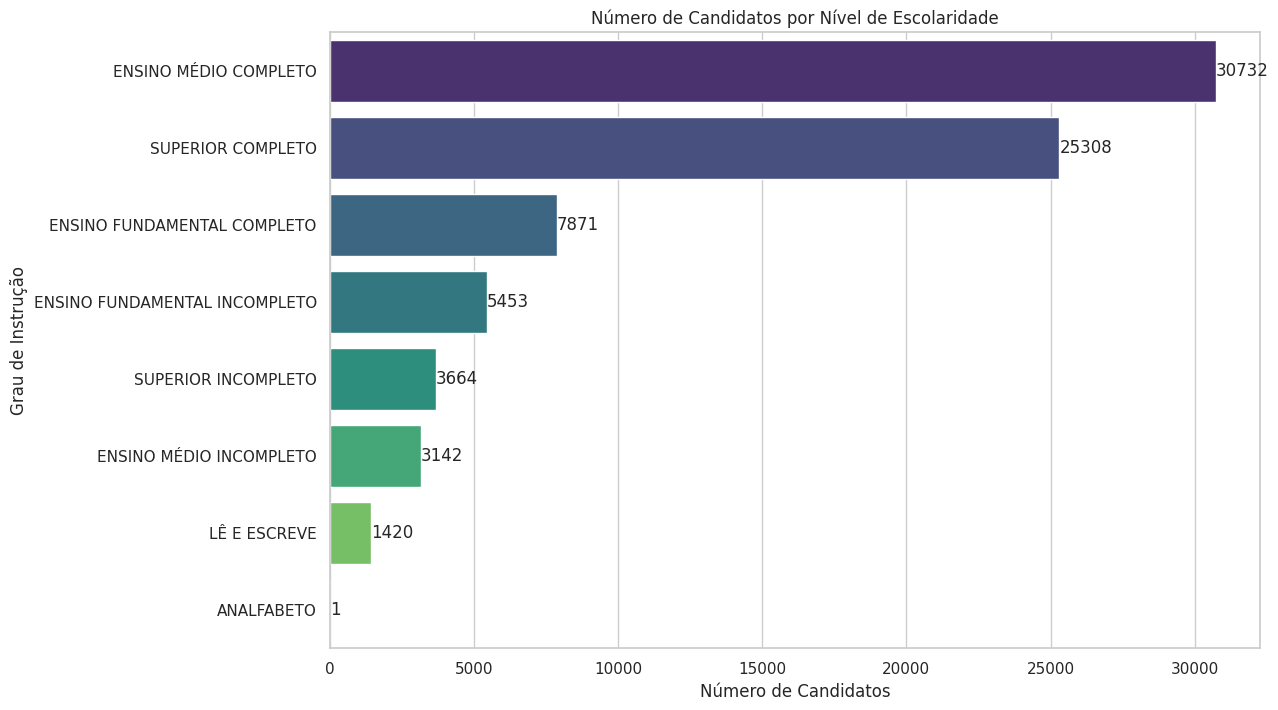

In [64]:
# Configura√ß√µes para gr√°ficos
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Contar o n√∫mero de candidatos por n√≠vel de escolaridade
escolaridade_count = eleicao['DS_GRAU_INSTRUCAO'].value_counts()

# Criar o DataFrame para o gr√°fico
df_escolaridade = escolaridade_count.reset_index()
df_escolaridade.columns = ['Grau de Instru√ß√£o', 'N√∫mero de Candidatos']

# Criar o gr√°fico de barras
ax = sns.barplot(x='N√∫mero de Candidatos', y='Grau de Instru√ß√£o', data=df_escolaridade, hue='Grau de Instru√ß√£o', dodge=False, palette='viridis', legend=False)

plt.title('N√∫mero de Candidatos por N√≠vel de Escolaridade')
plt.xlabel('N√∫mero de Candidatos')
plt.ylabel('Grau de Instru√ß√£o')

# Adicionar r√≥tulos √†s barras
for index, row in df_escolaridade.iterrows():
    ax.annotate(f"{row['N√∫mero de Candidatos']}", xy=(row['N√∫mero de Candidatos'], index), ha='left', va='center')

# Mostrar o gr√°fico
plt.show()

   - **Compara√ß√£o por Estado Civil:** Analisar a rela√ß√£o entre estado civil ( `DS_ESTADO_CIVIL`) e outros atributos, como n√∫mero de candidatos.

In [65]:
# Contar o n√∫mero de candidatos por estado civil
estado_civil_count = eleicao['DS_ESTADO_CIVIL'].value_counts()

# Criar o DataFrame para o gr√°fico
df_estado_civil = estado_civil_count.reset_index()
df_estado_civil.columns = ['Estado Civil', 'N√∫mero de Candidatos']

# Criar o gr√°fico de barras
fig = px.bar(df_estado_civil, x='N√∫mero de Candidatos', y='Estado Civil', color='Estado Civil', title='N√∫mero de Candidatos por Estado Civil')
fig.update_layout(xaxis_title='N√∫mero de Candidatos', yaxis_title='Estado Civil')
fig.show()

In [66]:
# Configura√ß√µes para gr√°ficos
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Contar o n√∫mero de candidatos por estado civil
estado_civil_count = eleicao['DS_ESTADO_CIVIL'].value_counts()

# Criar o DataFrame para o gr√°fico
df_estado_civil = estado_civil_count.reset_index()
df_estado_civil.columns = ['Estado Civil', 'N√∫mero de Candidatos']

# Criar o gr√°fico de barras
sns.barplot(x='N√∫mero de Candidatos', y='Estado Civil', data=df_estado_civil, hue='Estado Civil', dodge=False, palette='viridis', legend=False)

plt.title('N√∫mero de Candidatos por Estado Civil')
plt.xlabel('N√∫mero de Candidatos')
plt.ylabel('Estado Civil')

# Mostrar o gr√°fico
plt.show()

   - **Diversidade Racial:** Analisar a distribui√ß√£o de candidatos por ra√ßa/cor (`CD_COR_RACA`, `DS_COR_RACA`).

In [67]:
# Contar o n√∫mero de candidatos por ra√ßa/cor
cor_raca_count = eleicao['DS_COR_RACA'].value_counts()

# Criar o DataFrame para o gr√°fico
df_cor_raca = cor_raca_count.reset_index()
df_cor_raca.columns = ['Cor/Ra√ßa', 'N√∫mero de Candidatos']

# Criar o gr√°fico de barras com a plotly
fig = px.bar(df_cor_raca, x='N√∫mero de Candidatos', y='Cor/Ra√ßa', color='Cor/Ra√ßa', title='N√∫mero de Candidatos por Cor/Ra√ßa')
fig.update_layout(xaxis_title='N√∫mero de Candidatos', yaxis_title='Cor/Ra√ßa')
fig.show()

In [68]:
# Configura√ß√µes para gr√°ficos
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Contar o n√∫mero de candidatos por ra√ßa/cor
cor_raca_count = eleicao['DS_COR_RACA'].value_counts()

# Criar o DataFrame para o gr√°fico
df_cor_raca = cor_raca_count.reset_index()
df_cor_raca.columns = ['Cor/Ra√ßa', 'N√∫mero de Candidatos']

# Criar o gr√°fico de barras com matplotlib
ax = sns.barplot(x='N√∫mero de Candidatos', y='Cor/Ra√ßa', data=df_cor_raca, hue='Cor/Ra√ßa', dodge=False, palette='viridis', legend=False)

plt.title('N√∫mero de Candidatos por Cor/Ra√ßa')
plt.xlabel('N√∫mero de Candidatos')
plt.ylabel('Cor/Ra√ßa')

# Adicionar r√≥tulos √†s barras
for index, row in df_cor_raca.iterrows():
    ax.annotate(f"{row['N√∫mero de Candidatos']}", xy=(row['N√∫mero de Candidatos'], index), ha='left', va='center')

# Mostrar o gr√°fico
plt.show()

   - **Diversidade por Ocupa√ß√£o:** Estudar as ocupa√ß√µes mais comuns entre os candidatos (`DS_OCUPACAO`).

In [69]:
# Carregar o arquivo CSV
df = pd.read_csv('/content/candidatosSP.csv')

# Contar o n√∫mero de candidatos por ocupa√ß√£o
ocupacao_count = df['DS_OCUPACAO'].value_counts()

# Criar o DataFrame para a tabela
df_ocupacao = ocupacao_count.reset_index()
df_ocupacao.columns = ['Ocupa√ß√£o', 'N√∫mero de Candidatos']

# Ordenar a tabela em ordem decrescente de n√∫mero de candidatos
df_ocupacao = df_ocupacao.sort_values(by='N√∫mero de Candidatos', ascending=False)

# Exibir a tabela
print(df_ocupacao)

                                 Ocupa√ß√£o  N√∫mero de Candidatos
0                                  OUTROS                 19192
1                              EMPRES√ÅRIO                  6699
2              SERVIDOR P√öBLICO MUNICIPAL                  5943
3                             COMERCIANTE                  3965
4    APOSENTADO (EXCETO SERVIDOR P√öBLICO)                  3936
..                                    ...                   ...
233                            ARQUE√ìLOGO                     1
232                   JOALHEIRO E OURIVES                     1
230                            MAGISTRADO                     1
229                    MINISTRO DE ESTADO                     1
239                             GEOF√çSICO                     1

[240 rows x 2 columns]


In [70]:
# Configura√ß√µes para mostrar a tabela inteira
pd.set_option('display.max_rows', None)  # Mostrar todas as linhas
pd.set_option('display.max_columns', None)  # Mostrar todas as colunas
pd.set_option('display.width', None)  # Ajustar a largura da tela
pd.set_option('display.max_colwidth', None)  # Mostrar todo o conte√∫do das c√©lulas

# Carregar o arquivo CSV
df = pd.read_csv('/content/candidatosSP.csv')

# Contar o n√∫mero de candidatos por ocupa√ß√£o
ocupacao_count = df['DS_OCUPACAO'].value_counts()

# Criar o DataFrame para a tabela
df_ocupacao = ocupacao_count.reset_index()
df_ocupacao.columns = ['Ocupa√ß√£o', 'N√∫mero de Candidatos']

# Ordenar a tabela em ordem decrescente de n√∫mero de candidatos
df_ocupacao = df_ocupacao.sort_values(by='N√∫mero de Candidatos', ascending=False)

# Exibir a tabela
print(df_ocupacao)

                                                                   Ocupa√ß√£o  N√∫mero de Candidatos
0                                                                    OUTROS                 19192
1                                                                EMPRES√ÅRIO                  6699
2                                                SERVIDOR P√öBLICO MUNICIPAL                  5943
3                                                               COMERCIANTE                  3965
4                                      APOSENTADO (EXCETO SERVIDOR P√öBLICO)                  3936
5                                                                  ADVOGADO                  2310
6                                                                  VEREADOR                  2127
7                                                              DONA DE CASA                  1925
8                                                             ADMINISTRADOR                  1808
9             

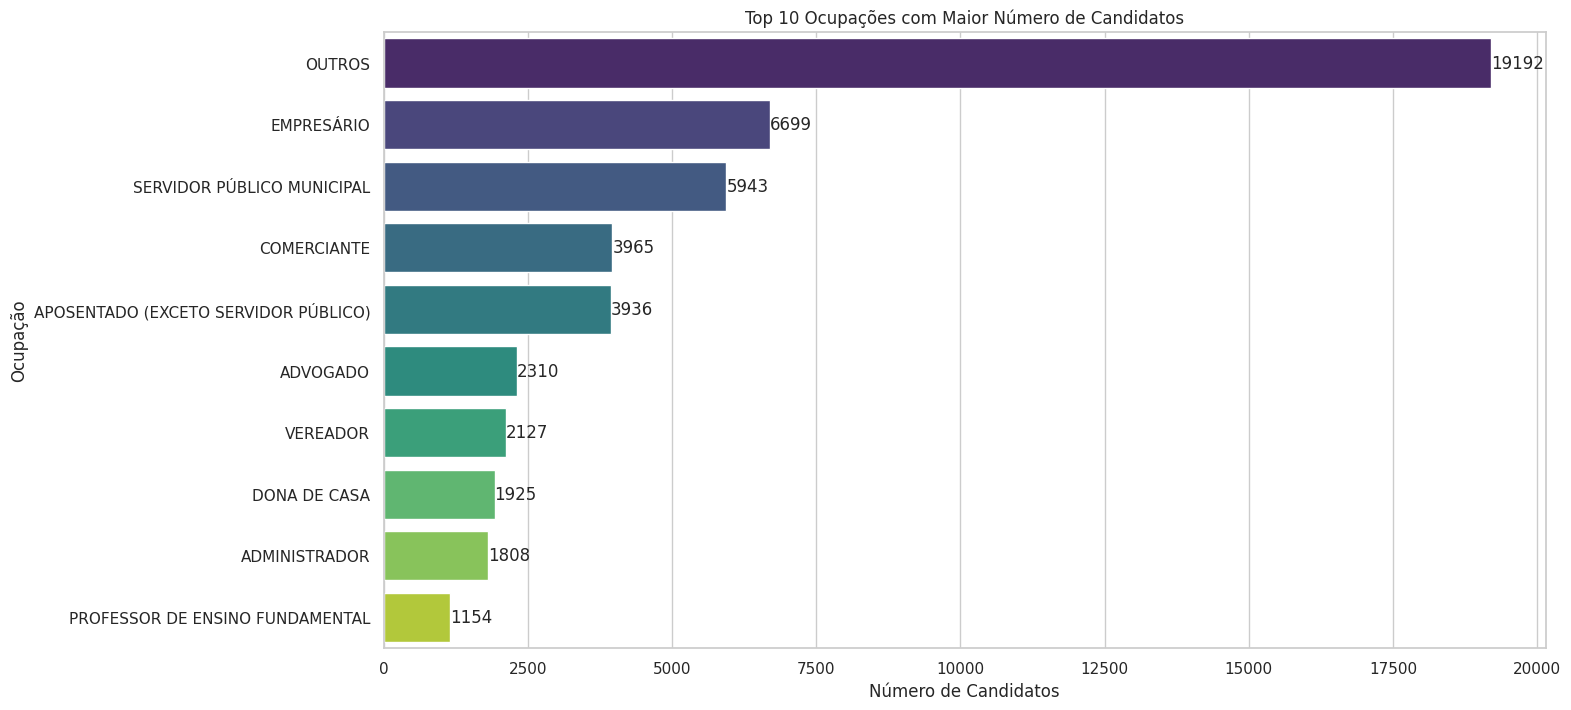

In [71]:
# Configura√ß√µes para gr√°ficos
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

# Contar o n√∫mero de candidatos por ocupa√ß√£o
ocupacao_count = eleicao['DS_OCUPACAO'].value_counts()

# Criar o DataFrame para o gr√°fico
df_ocupacao = ocupacao_count.reset_index()
df_ocupacao.columns = ['Ocupa√ß√£o', 'N√∫mero de Candidatos']

# Filtrar as 10 maiores ocupa√ß√µes
df_top_10_ocupacao = df_ocupacao.head(10)

# Criar o gr√°fico de barras
ax = sns.barplot(x='N√∫mero de Candidatos', y='Ocupa√ß√£o', data=df_top_10_ocupacao, hue='Ocupa√ß√£o', dodge=False, palette='viridis', legend=False)

plt.title('Top 10 Ocupa√ß√µes com Maior N√∫mero de Candidatos')
plt.xlabel('N√∫mero de Candidatos')
plt.ylabel('Ocupa√ß√£o')

# Adicionar r√≥tulos √†s barras
for index, row in df_ocupacao.iterrows():
    ax.annotate(f"{row['N√∫mero de Candidatos']}", xy=(row['N√∫mero de Candidatos'], index), ha='left', va='center')

# Mostrar o gr√°fico
plt.show()

   - **An√°lise de Correspond√™ncia:** Explorar as rela√ß√µes entre vari√°veis categ√≥ricas, como cargo, partido, e g√™nero.

In [72]:
# Contar o n√∫mero de candidatos por combina√ß√£o de cargo, partido e g√™nero
contagem = eleicao.groupby(['DS_CARGO', 'SG_PARTIDO', 'DS_GENERO']).size().reset_index(name='N√∫mero de Candidatos')

print("Tabela de Quantidade de Candidatos por Cargo:")
print(contagem.head(30))  # Exibe as primeiras 30 linhas da tabela de frequ√™ncias

Tabela de Quantidade de Candidatos por Cargo:
    DS_CARGO SG_PARTIDO  DS_GENERO  N√∫mero de Candidatos
0   PREFEITO       AGIR  MASCULINO                    11
1   PREFEITO     AVANTE   FEMININO                     1
2   PREFEITO     AVANTE  MASCULINO                    19
3   PREFEITO  CIDADANIA   FEMININO                     1
4   PREFEITO  CIDADANIA  MASCULINO                    14
5   PREFEITO         DC   FEMININO                     2
6   PREFEITO         DC  MASCULINO                    15
7   PREFEITO        MDB   FEMININO                    27
8   PREFEITO        MDB  MASCULINO                   150
9   PREFEITO   MOBILIZA   FEMININO                     2
10  PREFEITO   MOBILIZA  MASCULINO                    20
11  PREFEITO       NOVO   FEMININO                     5
12  PREFEITO       NOVO  MASCULINO                    38
13  PREFEITO    PC do B  MASCULINO                     1
14  PREFEITO        PCB  MASCULINO                     3
15  PREFEITO        PCO   FEMININO       

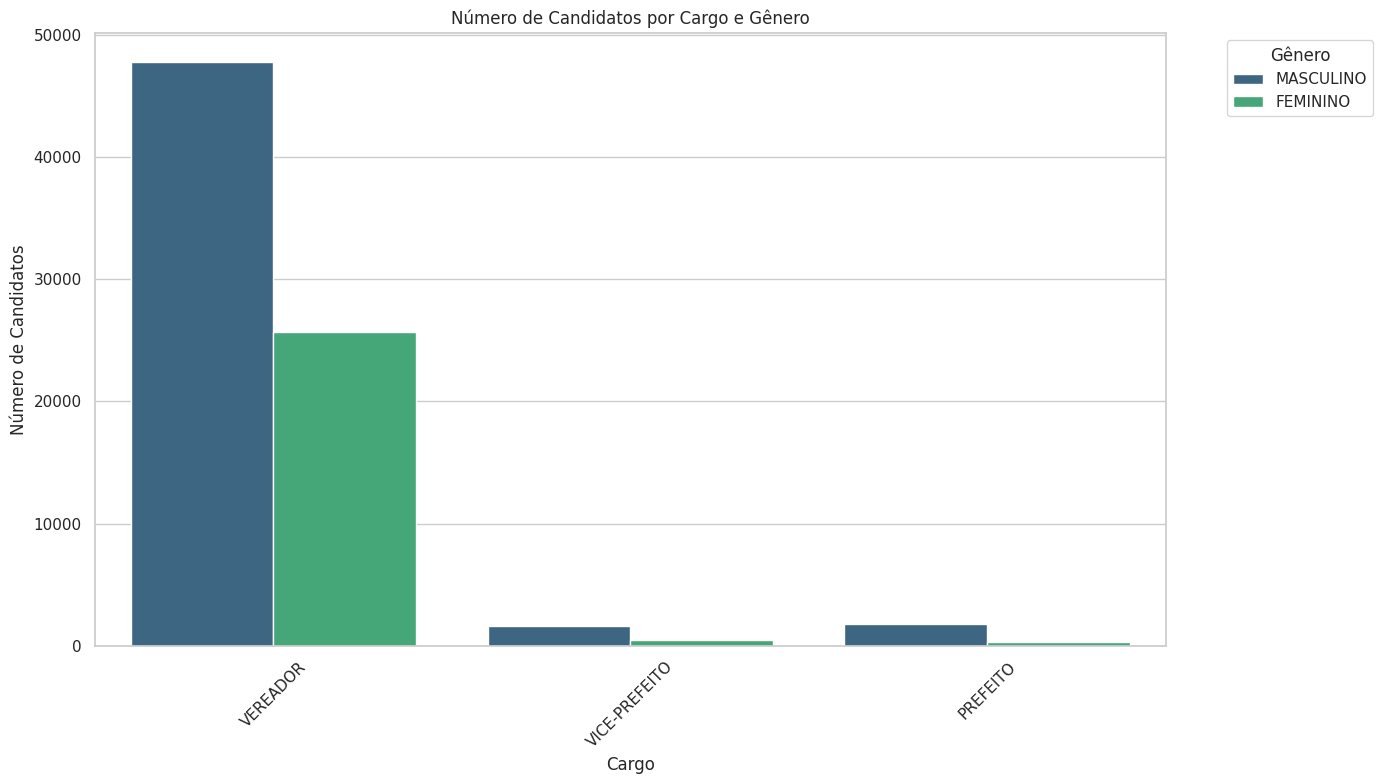

In [73]:
# Gr√°fico de barras empilhadas para Cargo e G√™nero
plt.figure(figsize=(14, 8))
sns.countplot(data=eleicao, x='DS_CARGO', hue='DS_GENERO', palette='viridis')
plt.title('N√∫mero de Candidatos por Cargo e G√™nero')
plt.xlabel('Cargo')
plt.ylabel('N√∫mero de Candidatos')
plt.xticks(rotation=45)
plt.legend(title='G√™nero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [74]:
# Gr√°fico de barras empilhadas para Partido e G√™nero
plt.figure(figsize=(14, 8))
sns.countplot(data=eleicao, x='SG_PARTIDO', hue='DS_GENERO', palette='viridis')
plt.title('N√∫mero de Candidatos por Partido e G√™nero')
plt.xlabel('Partido')
plt.ylabel('N√∫mero de Candidatos')
plt.xticks(rotation=45)
plt.legend(title='G√™nero', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [75]:
# Tabela de conting√™ncia entre cargo e partido
tabela_contingencia = pd.crosstab(eleicao['DS_CARGO'], eleicao['SG_PARTIDO'])
print("\nTabela de N√∫mero de Candidatos por Partido e Cargo:")
print(tabela_contingencia)


Tabela de N√∫mero de Candidatos por Partido e Cargo:
SG_PARTIDO     AGIR  AVANTE  CIDADANIA    DC   MDB  MOBILIZA  NOVO  PC do B  PCB  PCO   PDT    PL  \
DS_CARGO                                                                                            
PREFEITO         11      20         15    17   177        22    43        1    3   14    42   289   
VEREADOR       1326    2871        838  1509  5807      1219  1341      192    6   25  2748  6252   
VICE-PREFEITO    20      41         11    26   204        23    56        6    3   13    46   218   

SG_PARTIDO     PMB  PODE    PP   PRD  PRTB   PSB   PSD  PSDB  PSOL  PSTU    PT   PV  REDE  \
DS_CARGO                                                                                    
PREFEITO         7   114   124    25    13    91   399    64    42     5   136   20    10   
VEREADOR       824  5237  4996  3297  1166  4238  6444  3220   862    22  3142  623   613   
VICE-PREFEITO    8   142   142    59    18   109   199   100    49  

In [76]:
# Gr√°fico de barras empilhadas para Cargo e Partido
plt.figure(figsize=(14, 8))
sns.countplot(data=eleicao, x='DS_CARGO', hue='SG_PARTIDO', palette='viridis')
plt.title('N√∫mero de Candidatos por Cargo e Partido')
plt.xlabel('Cargo')
plt.ylabel('N√∫mero de Candidatos')
plt.xticks(rotation=45)
plt.legend(title='Partido', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- **Despesas de Campanha**

In [77]:
# Calcular o valor m√°ximo das despesas de campanha
valor_maximo = eleicao['VR_DESPESA_MAX_CAMPANHA'].max()

# Calcular o valor m√≠nimo das despesas de campanha
valor_minimo = eleicao['VR_DESPESA_MAX_CAMPANHA'].min()

# Calcular o valor m√©dio das despesas de campanha
valor_medio = eleicao['VR_DESPESA_MAX_CAMPANHA'].mean()

# Calcular a mediana das despesas de campanha
mediana = eleicao['VR_DESPESA_MAX_CAMPANHA'].median()

# Calcular a moda das despesas de campanha
moda = eleicao['VR_DESPESA_MAX_CAMPANHA'].mode()

# Calcular o Desvio Padr√£o das despesas de campanha
desvio_padrao = eleicao['VR_DESPESA_MAX_CAMPANHA'].std()

# Exibir os resultados
print(f"Valor m√°ximo das despesas de campanha: R$ {valor_maximo}")
print(f"Valor m√≠nimo das despesas de campanha: R$ {valor_minimo}")
print(f"Valor m√©dio das despesas de campanha: R$ {valor_medio:.2f}")
print(f"Mediana das despesas de campanha: R$ {mediana:.2f}")
print(f"Moda das despesas de campanha: R$ {moda[0]:.2f}")
print(f"Desvio padr√£o das despesas de campanha: R$ {desvio_padrao:.2f}")

Valor m√°ximo das despesas de campanha: R$ 67276114.5
Valor m√≠nimo das despesas de campanha: R$ -1.0
Valor m√©dio das despesas de campanha: R$ 163736.05
Mediana das despesas de campanha: R$ 34314.49
Moda das despesas de campanha: R$ 15985.08
Desvio padr√£o das despesas de campanha: R$ 951919.00


In [78]:
# Calculo de Quartis
quartis = eleicao['VR_DESPESA_MAX_CAMPANHA'].quantile([0.25, 0.5, 0.75])
print(f"Quartis das despesas de campanha:\n{quartis}")

Quartis das despesas de campanha:
0.25    15985.08
0.50    34314.49
0.75    99823.41
Name: VR_DESPESA_MAX_CAMPANHA, dtype: float64


#Hip√≥teses ‚úÖ ‚ùå

- ***Rela√ß√£o entre Ocupa√ß√£o e Despesas de Campanha***

Hip√≥tese: Ocupa√ß√µes diferentes est√£o associadas a m√©dias diferentes de despesas de campanha.

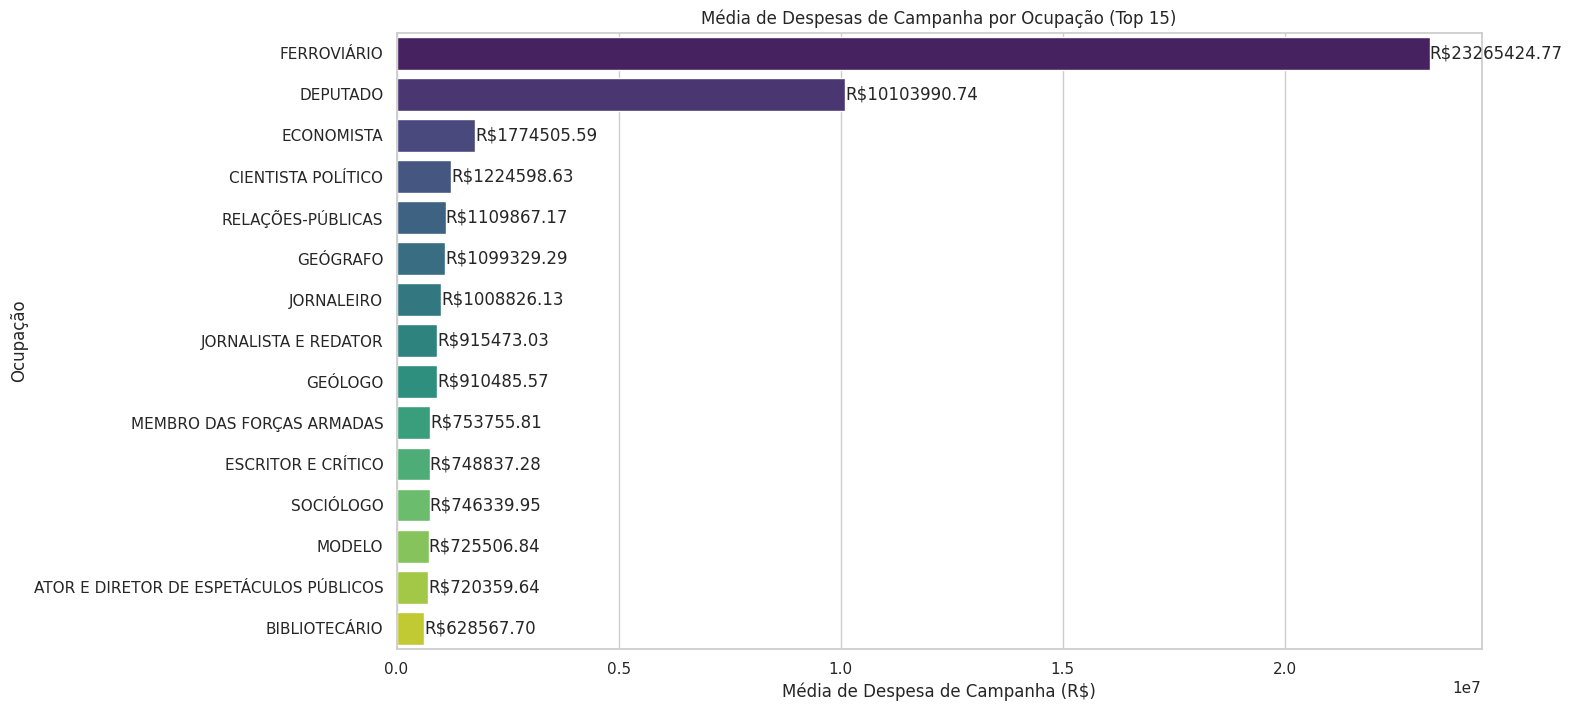

In [79]:
# Calcular a m√©dia das despesas por ocupa√ß√£o
despesa_por_ocupacao = eleicao.groupby('DS_OCUPACAO')['VR_DESPESA_MAX_CAMPANHA'].mean().sort_values(ascending=False).head(15)

# Plotar um gr√°fico de barras
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=despesa_por_ocupacao.values, y=despesa_por_ocupacao.index, hue=despesa_por_ocupacao.index, palette='viridis', dodge=False, legend=False)

# Adicionar r√≥tulos √†s barras
for index, value in enumerate(despesa_por_ocupacao.values):
    ax.text(value, index, f"R${value:.2f}", ha='left', va='center')

plt.title('M√©dia de Despesas de Campanha por Ocupa√ß√£o (Top 15)')
plt.xlabel('M√©dia de Despesa de Campanha (R$)')
plt.ylabel('Ocupa√ß√£o')

# Mostrar o gr√°fico
plt.show()

In [80]:
#An√°lise de Vari√¢ncia: Para comparar as m√©dias das despesas entre diferentes ocupa√ß√µes.
grupos = [grupo['VR_DESPESA_MAX_CAMPANHA'].values for nome, grupo in eleicao.groupby('DS_OCUPACAO')]
estatistica, p_valor = f_oneway(*grupos)
print(f'Estat√≠stica F: {estatistica}, p-valor: {p_valor}')

Estat√≠stica F: 29.7810929212277, p-valor: 0.0


Podemos rejeitar a hip√≥tese nula (que as m√©dias s√£o iguais), ou seja as ocupa√ß√µes/profissoes est√£o associadas a diferentes m√©dias de despesas de campanha.

 **Conclus√£o:**
 Sendo assim, ap√≥s analise podemos concluir que √© muito prov√°vel que as ocupa√ß√µes estejam associadas a diferentes m√©dias de despesas de campanha, confirmando que h√° uma rela√ß√£o significativa entre a ocupa√ß√£o e as despesas de campanha dos candidatos. **HIPOTESE CONFIRMADA!** ‚úÖ

- ***Diferen√ßa nas Despesas de Campanha por Estado Civil***

Hip√≥tese: Existe uma diferen√ßa significativa nas despesas de campanha entre diferentes estados civis.

In [81]:
#M√©dia e Mediana das Despesas por Estado Civil:
media_por_estado_civil = eleicao.groupby('DS_ESTADO_CIVIL')['VR_DESPESA_MAX_CAMPANHA'].mean()
mediana_por_estado_civil = eleicao.groupby('DS_ESTADO_CIVIL')['VR_DESPESA_MAX_CAMPANHA'].median()

print("M√©dia das Despesas por Estado Civil:")
print(media_por_estado_civil)
print("\nMediana das Despesas por Estado Civil:")
print(mediana_por_estado_civil)

M√©dia das Despesas por Estado Civil:
DS_ESTADO_CIVIL
CASADO(A)                    155186.367575
DIVORCIADO(A)                197324.107105
SEPARADO(A) JUDICIALMENTE    191788.565643
SOLTEIRO(A)                  167639.739803
VI√öVO(A)                     129166.215284
Name: VR_DESPESA_MAX_CAMPANHA, dtype: float64

Mediana das Despesas por Estado Civil:
DS_ESTADO_CIVIL
CASADO(A)                    34048.20
DIVORCIADO(A)                39883.88
SEPARADO(A) JUDICIALMENTE    29894.60
SOLTEIRO(A)                  31659.66
VI√öVO(A)                     29462.02
Name: VR_DESPESA_MAX_CAMPANHA, dtype: float64


In [82]:
# Calcular a m√©dia das despesas por estado civil
despesa_por_estado_civil = eleicao.groupby('DS_ESTADO_CIVIL')['VR_DESPESA_MAX_CAMPANHA'].mean()

# Plotar um gr√°fico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=despesa_por_estado_civil.values, y=despesa_por_estado_civil.index)

# Adicionar r√≥tulos √†s barras
for index, value in enumerate(despesa_por_estado_civil.values):
    ax.text(value, index, f"R${value:.2f}", ha='left', va='center')

plt.title('M√©dia de Despesas de Campanha por Estado Civil')
plt.xlabel('M√©dia de Despesa de Campanha (R$)')
plt.ylabel('Estado Civil')

# Mostrar o gr√°fico
plt.show()

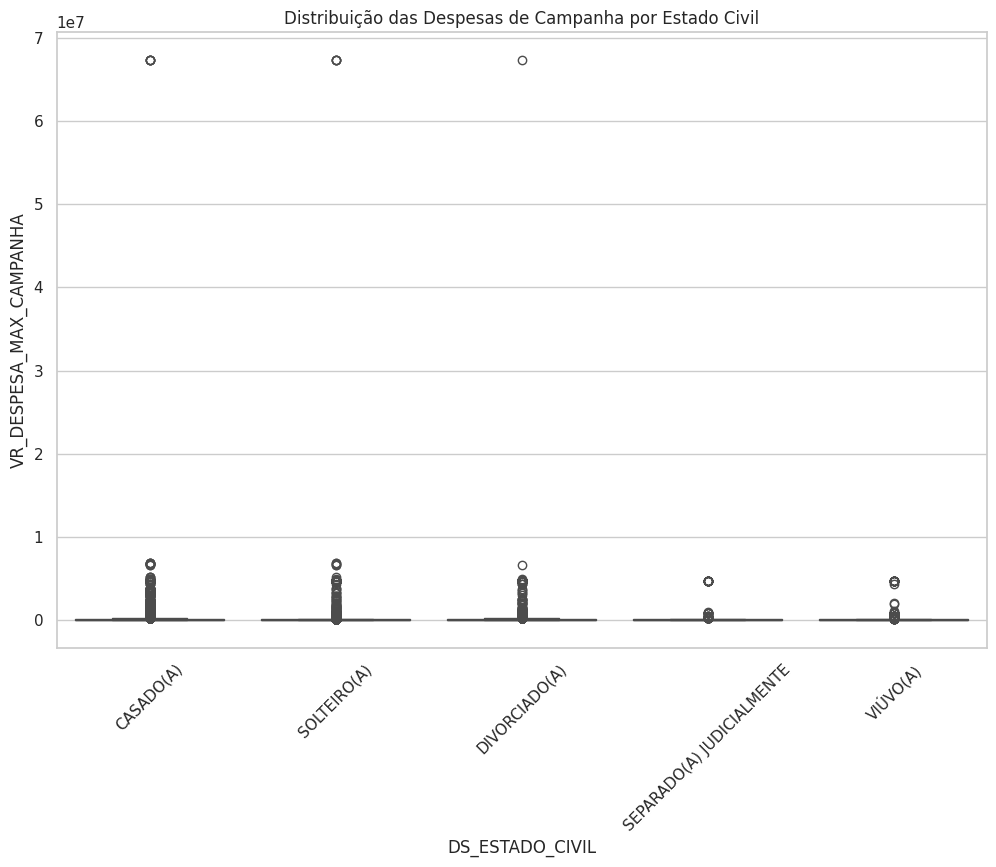

In [83]:
#Boxplot das Despesas por Estado Civil:
plt.figure(figsize=(12, 8))
sns.boxplot(x='DS_ESTADO_CIVIL', y='VR_DESPESA_MAX_CAMPANHA', data=eleicao)
plt.title('Distribui√ß√£o das Despesas de Campanha por Estado Civil')
plt.xticks(rotation=45)
plt.show()

- Pontos mais acima do grafico indicam os gastos dos prefeitos do estado de SP que utilizaram um valor muito superior aos de outros candidatos, como vereador e vice-prefeito.

In [84]:
#An√°lise de Vari√¢ncia: Para comparar as m√©dias das despesas entre diferentes ocupa√ß√µes.
grupos = [grupo['VR_DESPESA_MAX_CAMPANHA'].values for nome, grupo in eleicao.groupby('DS_ESTADO_CIVIL')]
estatistica, p_valor = f_oneway(*grupos)
print(f'Estat√≠stica F: {estatistica}, p-valor: {p_valor}')

Estat√≠stica F: 4.58742383349116, p-valor: 0.0010551658165555446


**Conclus√£o:**
Com base nesses resultados, podemos rejeitar a hip√≥tese nula e concluir que existe uma diferen√ßa estatisticamente significativa nas despesas de campanha entre os diferentes estados civis. Em outras palavras, o estado civil dos candidatos est√° associado a diferentes m√©dias de despesas de campanha. **HIPOTESE CONFIRMADA!** ‚úÖ

- ***Impacto da Escolaridade nas Despesas de Campanha***

Hip√≥tese: O n√≠vel de escolaridade afeta a m√©dia das despesas de campanha.

In [85]:
# Calcular a m√©dia das despesas por n√≠vel de escolaridade
despesa_por_escolaridade = eleicao.groupby('DS_GRAU_INSTRUCAO')['VR_DESPESA_MAX_CAMPANHA'].mean().sort_values(ascending=False)

# Plotar um gr√°fico de barras
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=despesa_por_escolaridade.values, y=despesa_por_escolaridade.index)

# Adicionar r√≥tulos √†s barras
for index, value in enumerate(despesa_por_escolaridade.values):
    ax.text(value, index, f"R${value:.2f}", ha='left', va='center')

plt.title('M√©dia de Despesas de Campanha por N√≠vel de Escolaridade')
plt.xlabel('M√©dia de Despesa de Campanha (R$)')
plt.ylabel('Grau de Instru√ß√£o')

# Mostrar o gr√°fico
plt.show()

In [86]:
#An√°lise de Vari√¢ncia: Para comparar as m√©dias das despesas entre diferentes ocupa√ß√µes.
grupos = [grupo['VR_DESPESA_MAX_CAMPANHA'].values for nome, grupo in eleicao.groupby('DS_GRAU_INSTRUCAO')]
estatistica, p_valor = f_oneway(*grupos)
print(f'Estat√≠stica F: {estatistica}, p-valor: {p_valor}')

Estat√≠stica F: 83.59058978124146, p-valor: 1.1378424602173357e-121


Com base nesses resultados, podemos rejeitar a hip√≥tese nula de que as m√©dias das despesas de campanha entre os diferentes n√≠veis de escolaridade s√£o iguais. Em outras palavras, o n√≠vel de escolaridade tem um impacto significativo nas despesas de campanha.

In [87]:
#Teste de Tukey: usei o teste de Tukey para identificar quais grupos diferem entre si.
comparacao = mc.MultiComparison(eleicao['VR_DESPESA_MAX_CAMPANHA'], eleicao['DS_GRAU_INSTRUCAO'])
resultado = comparacao.tukeyhsd()
print(resultado)

                              Multiple Comparison of Means - Tukey HSD, FWER=0.05                               
            group1                        group2              meandiff  p-adj      lower        upper     reject
----------------------------------------------------------------------------------------------------------------
                   ANALFABETO   ENSINO FUNDAMENTAL COMPLETO   69950.036    1.0 -2804773.0652 2944673.1372  False
                   ANALFABETO ENSINO FUNDAMENTAL INCOMPLETO  50407.4928    1.0 -2824396.5731 2925211.5586  False
                   ANALFABETO         ENSINO M√âDIO COMPLETO  94417.9868    1.0 -2780169.2845  2969005.258  False
                   ANALFABETO       ENSINO M√âDIO INCOMPLETO 117540.3757    1.0 -2757457.5297 2992538.2811  False
                   ANALFABETO                  L√ä E ESCREVE  52964.2264    1.0 -2822588.2614 2928516.7141  False
                   ANALFABETO             SUPERIOR COMPLETO 244359.1362    1.0 -2630238.1581 

**An√°lise do Resultado das interpreta√ß√µes das compara√ß√µes significativas e n√£o significativas:**

Significativas (**onde "reject" √© True**):

*ENSINO FUNDAMENTAL COMPLETO vs. SUPERIOR COMPLETO*

Diferen√ßa m√©dia: R$174.409,10
p-valor ajustado: 0.0
Conclus√£o: As despesas de campanha s√£o significativamente maiores para quem tem ensino superior completo comparado a quem tem ensino fundamental completo.

*ENSINO FUNDAMENTAL COMPLETO vs. SUPERIOR INCOMPLETO*

Diferen√ßa m√©dia: R$232.528,51
p-valor ajustado: 0.0
Conclus√£o: As despesas de campanha s√£o significativamente maiores para quem tem superior incompleto comparado a quem tem ensino fundamental completo.

*ENSINO FUNDAMENTAL INCOMPLETO vs. ENSINO M√âDIO COMPLETO*

Diferen√ßa m√©dia: R$44.010,49
p-valor ajustado: 0.0341
Conclus√£o: As despesas de campanha s√£o significativamente maiores para quem tem ensino m√©dio completo comparado a quem tem ensino fundamental incompleto.

*ENSINO FUNDAMENTAL INCOMPLETO vs. ENSINO M√âDIO INCOMPLETO*

Diferen√ßa m√©dia: R$67.132,88
p-valor ajustado: 0.0338
Conclus√£o: As despesas de campanha s√£o significativamente maiores para quem tem ensino m√©dio incompleto comparado a quem tem ensino fundamental incompleto.

*ENSINO FUNDAMENTAL INCOMPLETO vs. SUPERIOR COMPLETO*

Diferen√ßa m√©dia: R$193.951,64
p-valor ajustado: 0.0
Conclus√£o: As despesas de campanha s√£o significativamente maiores para quem tem superior completo comparado a quem tem ensino fundamental incompleto.

*ENSINO FUNDAMENTAL INCOMPLETO vs. SUPERIOR INCOMPLETO*

Diferen√ßa m√©dia: R$252.071,06
p-valor ajustado: 0.0
Conclus√£o: As despesas de campanha s√£o significativamente maiores para quem tem superior incompleto comparado a quem tem ensino fundamental incompleto.

*ENSINO M√âDIO COMPLETO vs. SUPERIOR COMPLETO*

Diferen√ßa m√©dia: R$149.941,15
p-valor ajustado: 0.0
Conclus√£o: As despesas de campanha s√£o significativamente maiores para quem tem superior completo comparado a quem tem ensino m√©dio completo.

*ENSINO M√âDIO COMPLETO vs. SUPERIOR INCOMPLETO*

Diferen√ßa m√©dia: R$208.060,56
p-valor ajustado: 0.0
Conclus√£o: As despesas de campanha s√£o significativamente maiores para quem tem superior incompleto comparado a quem tem ensino m√©dio completo.

*ENSINO M√âDIO INCOMPLETO vs. SUPERIOR COMPLETO*

Diferen√ßa m√©dia: R$126.818,76
p-valor ajustado: 0.0
Conclus√£o: As despesas de campanha s√£o significativamente maiores para quem tem superior completo comparado a quem tem ensino m√©dio incompleto.

*ENSINO M√âDIO INCOMPLETO vs. SUPERIOR INCOMPLETO*

Diferen√ßa m√©dia: R$184.938,17
p-valor ajustado: 0.0
Conclus√£o: As despesas de campanha s√£o significativamente maiores para quem tem superior incompleto comparado a quem tem ensino m√©dio incompleto.

*L√ä E ESCREVE vs. SUPERIOR COMPLETO*

Diferen√ßa m√©dia: R$191.394,91
p-valor ajustado: 0.0
Conclus√£o: As despesas de campanha s√£o significativamente maiores para quem tem superior completo comparado a quem sabe ler e escrever.

*L√ä E ESCREVE vs. SUPERIOR INCOMPLETO*

Diferen√ßa m√©dia: R$249.514,32
p-valor ajustado: 0.0
Conclus√£o: As despesas de campanha s√£o significativamente maiores para quem tem superior incompleto comparado a quem sabe ler e escrever.

*SUPERIOR COMPLETO vs. SUPERIOR INCOMPLETO*

Diferen√ßa m√©dia: R$58.119,41
p-valor ajustado: 0.0123
Conclus√£o: As despesas de campanha s√£o significativamente maiores para quem tem superior incompleto comparado a quem tem superior completo.

N√£o Significativas (**onde "reject" √© False**):
Compara√ß√µes como ANALFABETO vs. ENSINO FUNDAMENTAL COMPLETO, ENSINO M√âDIO COMPLETO vs. ENSINO M√âDIO INCOMPLETO, entre outras, n√£o apresentam diferen√ßas significativas nas despesas de campanha.

**Conclus√£o:**
O teste de Tukey indica que h√° diferen√ßas significativas nas despesas de campanha entre v√°rios pares de n√≠veis de escolaridade, com exce√ß√£o de algumas compara√ß√µes espec√≠ficas onde as diferen√ßas n√£o s√£o estatisticamente significativas. Os resultados sugerem que indiv√≠duos com maior n√≠vel de escolaridade tendem a ter despesas de campanha significativamente maiores. **HIPOTESE CONFIRMADA!** ‚úÖ

- ***Diferen√ßa nas Despesas de Campanha por G√™nero***

Hip√≥tese: A m√©dia das despesas de campanha √© diferente entre g√™neros.


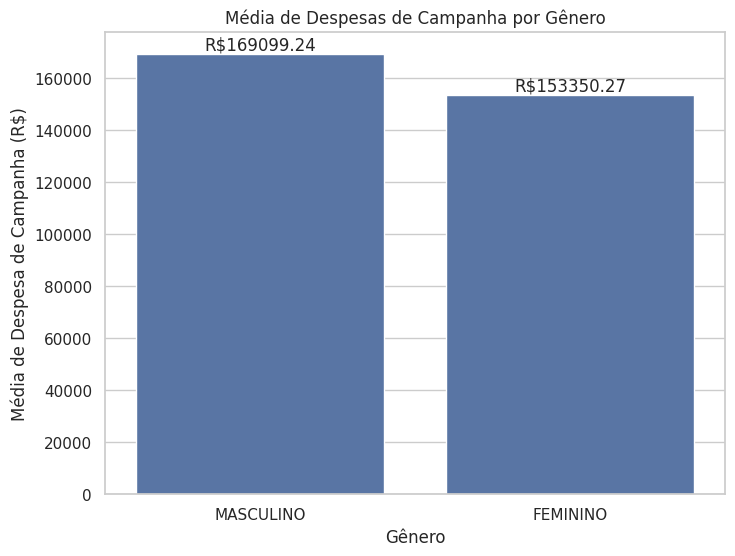

In [88]:
# Calcular a m√©dia das despesas por g√™nero
despesa_por_genero = eleicao.groupby('DS_GENERO')['VR_DESPESA_MAX_CAMPANHA'].mean().sort_values(ascending=False).reset_index()

# Plotar um gr√°fico de barras
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='DS_GENERO', y='VR_DESPESA_MAX_CAMPANHA', data=despesa_por_genero)

# Adicionar r√≥tulos √†s barras
for index, value in enumerate(despesa_por_genero['VR_DESPESA_MAX_CAMPANHA']):
    ax.text(index, value, f"R${value:.2f}", ha='center', va='bottom')

plt.title('M√©dia de Despesas de Campanha por G√™nero')
plt.xlabel('G√™nero')
plt.ylabel('M√©dia de Despesa de Campanha (R$)')

# Mostrar o gr√°fico
plt.show()

In [89]:
# Calcular a m√©dia das despesas por g√™nero
despesa_por_genero = eleicao.groupby('DS_GENERO')['VR_DESPESA_MAX_CAMPANHA'].mean().sort_values(ascending=False).reset_index()

# Criar o gr√°fico de pizza
plt.figure(figsize=(8, 6))
plt.pie(despesa_por_genero['VR_DESPESA_MAX_CAMPANHA'], labels=despesa_por_genero['DS_GENERO'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribui√ß√£o das Despesas de Campanha por G√™nero')
plt.show()

Diferenca de apenas 4,8% conforme mostra o gr√°fico de pizza.

In [90]:
# Filtrar os dados por g√™nero
genero_feminino = df[eleicao['DS_GENERO'] == 'Feminino']['VR_DESPESA_MAX_CAMPANHA']
genero_masculino = df[eleicao['DS_GENERO'] == 'Masculino']['VR_DESPESA_MAX_CAMPANHA']

# Teste t para amostras independentes
t_stat, p_value = stats.ttest_ind(genero_feminino, genero_masculino, equal_var=False)

# Resultados
f'Estat√≠stica t: {t_stat:.4f}'
f'P-Value: {p_value:.4f}'

# Interpreta√ß√£o
alpha = 0.05
if p_value < alpha:
    print("H√° uma diferen√ßa significativa nas despesas de campanha entre g√™neros.")
else:
    print("N√£o h√° uma diferen√ßa significativa nas despesas de campanha entre g√™neros.")

N√£o h√° uma diferen√ßa significativa nas despesas de campanha entre g√™neros.


**Conclus√£o:**
Ap√≥s analise podemos concluir que n√£o h√° uma diferen√ßa significativa nas despesas de campanha entre os g√™neros masculino e feminino! **HIPOTESE REFULTADA!** ‚ùå

- ***Diferen√ßa nas Despesas de Campanha por Partido***

Hip√≥tese: Existem diferen√ßas significativas nas despesas de campanha entre partidos.

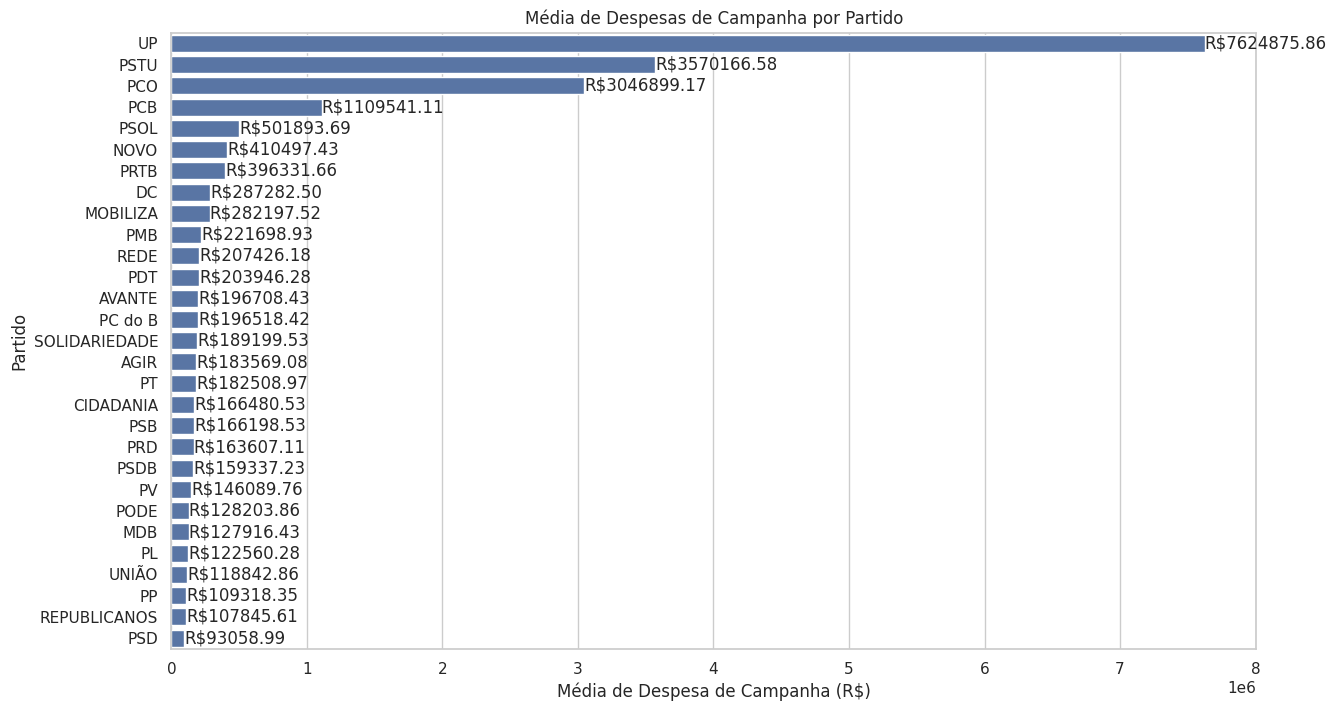

In [91]:
# Calcular a m√©dia das despesas por partido
despesa_por_partido = eleicao.groupby('SG_PARTIDO')['VR_DESPESA_MAX_CAMPANHA'].mean().sort_values(ascending=False).reset_index()

# Plotar um gr√°fico de barras
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='VR_DESPESA_MAX_CAMPANHA', y='SG_PARTIDO', data=despesa_por_partido)

# Adicionar r√≥tulos √†s barras
for index, value in enumerate(despesa_por_partido['VR_DESPESA_MAX_CAMPANHA']):
    ax.text(value, index, f"R${value:.2f}", ha='left', va='center')

plt.title('M√©dia de Despesas de Campanha por Partido')
plt.xlabel('M√©dia de Despesa de Campanha (R$)')
plt.ylabel('Partido')

# Mostrar o gr√°fico
plt.show()

In [92]:
#Teste de Kruskal-Wallis para testar se h√° diferen√ßas nas medianas das despesas de campanha entre v√°rios partidos.
grupos_partido = [grupo['VR_DESPESA_MAX_CAMPANHA'].values for nome, grupo in eleicao.groupby('SG_PARTIDO')]
estatistica_kw, p_valor_kw = kruskal(*grupos_partido)

print(f'Estat√≠stica de Kruskal-Wallis: {estatistica_kw}, p-valor: {p_valor_kw}')

Estat√≠stica de Kruskal-Wallis: 4675.781057604523, p-valor: 0.0


**Conclus√£o:**
Ap√≥s analise podemos concluir que h√° uma diferen√ßa significativa nas despesas de campanha entre pelo menos dois partidos, conforme mostra o grafico de barras inclinadas acima. **HIPOTESE CONFIRMADA!** ‚úÖ

- ***Correla√ß√£o entre Idade e Despesas de Campanha***

Hip√≥tese: A idade dos candidatos est√° correlacionada com o valor das despesas de campanha.


In [93]:
# Converter a coluna de data de nascimento para datetime
eleicao['DT_NASCIMENTO'] = pd.to_datetime(eleicao['DT_NASCIMENTO'], format='%d/%m/%Y', errors='coerce')

# Aplicar a fun√ß√£o para calcular a idade
eleicao['IDADE'] = eleicao['DT_NASCIMENTO'].apply(calcular_idade)

In [98]:
# Idade M√°xima e M√≠nima presente na base de Dados
idade_maxima = eleicao['IDADE'].max()
print(f'A idade m√°xima na base de dados √© de {idade_maxima} anos.')

idade_minima = eleicao['IDADE'].min()
print(f'A idade m√≠nima na base de dados √© de {idade_minima} anos.')

A idade m√°xima na base de dados √© de 96 anos.
A idade m√≠nima na base de dados √© de 11 anos.


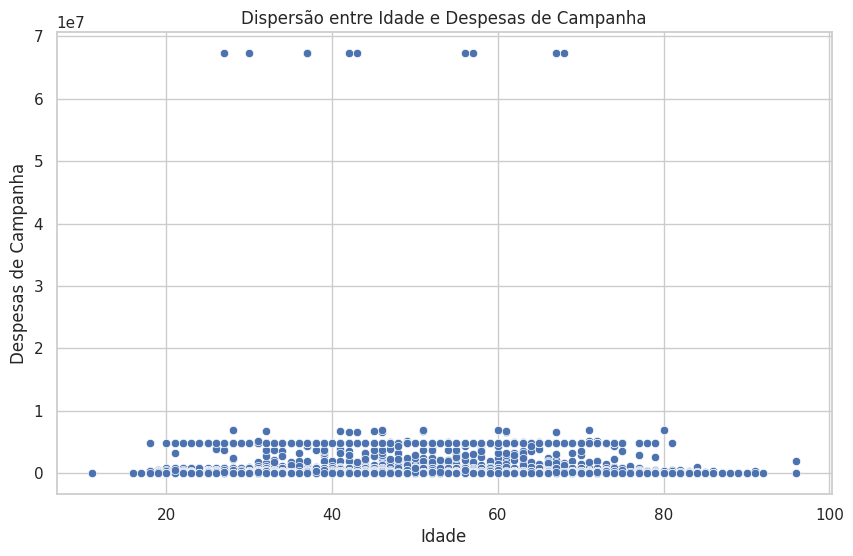

In [95]:
# Gr√°fico de Dispers√£o
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IDADE', y='VR_DESPESA_MAX_CAMPANHA', data=eleicao)
plt.title('Dispers√£o entre Idade e Despesas de Campanha')
plt.xlabel('Idade')
plt.ylabel('Despesas de Campanha')
plt.show()

In [96]:
# Calcular a correla√ß√£o de Pearson entre as vari√°veis
pearson_corr, pearson_p = stats.pearsonr(eleicao['IDADE'], eleicao['VR_DESPESA_MAX_CAMPANHA'])

# Resultados
print(f"Coeficiente de Correla√ß√£o de Pearson: {pearson_corr:.4f}, P-Value: {pearson_p:.4f}")

Coeficiente de Correla√ß√£o de Pearson: 0.0162, P-Value: 0.0000


**Conclus√£o:**
O coeficiente de correla√ß√£o de Pearson (0.0162) indica que h√° uma correla√ß√£o linear positiva extremamente fraca entre as vari√°veis. No entanto, o p-valor extremamente baixo (0.0000) sugere que essa rela√ß√£o, apesar de ser fraca, √© estatisticamente significativa e n√£o ocorre por acaso. Portanto, voc√™ pode concluir que, embora exista uma correla√ß√£o estatisticamente significativa, ela √© t√£o pequena que n√£o tem um impacto pr√°tico ou significativo. **HIPOTESE REFULTADA!** ‚ùå